In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([None, 4]))]
onx = convert_sklearn(clf, initial_types = initial_type)
with open("crop_recommendation.onnx","wb") as f:
    f.write(onx.SerializeToString())

ModuleNotFoundError: No module named 'skl2onnx'

In [2]:
#importing the dataset
crop = pd.read_csv("Crop_recommendation.csv")
crop.drop(crop[crop.label == 'muskmelon'].index, inplace = True )


In [3]:
#copying original data
data = crop.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2100 non-null   int64  
 1   P            2100 non-null   int64  
 2   K            2100 non-null   int64  
 3   temperature  2100 non-null   float64
 4   humidity     2100 non-null   float64
 5   ph           2100 non-null   float64
 6   rainfall     2100 non-null   float64
 7   label        2100 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 147.7+ KB


In [4]:
#checking for null values
data.isnull().sum().any()

False

In [5]:
#checking for unique values
for i in data.columns:
    print("column Name : ",i.upper())
    print("No. of unique values : {} \n".format(data[i].nunique()))
    if(data[i].dtype == 'object'):
        print('Unique values : ',pd.unique(data[i]))

column Name :  N
No. of unique values : 137 

column Name :  P
No. of unique values : 117 

column Name :  K
No. of unique values : 73 

column Name :  TEMPERATURE
No. of unique values : 2100 

column Name :  HUMIDITY
No. of unique values : 2100 

column Name :  PH
No. of unique values : 2100 

column Name :  RAINFALL
No. of unique values : 2100 

column Name :  LABEL
No. of unique values : 21 

Unique values :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']


There are 22 classes in output variable

In [6]:
#label encoding for output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
data['Encoded_label'] = encod.fit_transform(data.label) #label will be encoded in alphabetical order

In [7]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,19
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,19
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,19
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,19
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,19


In [8]:
#encoded labels for classes 
a = pd.DataFrame(pd.unique(data.label));
a.rename(columns={0:'label'},inplace=True)
b = pd.DataFrame(pd.unique(data.Encoded_label));
b.rename(columns={0:'encoded'},inplace=True)
classes = pd.concat([a,b],axis=1).sort_values('encoded').set_index('label')
classes

,encoded
label,
apple,0
banana,1
blackgram,2
chickpea,3
coconut,4
coffee,5
cotton,6
grapes,7
jute,8


In [9]:
#fetching the label for given encoded value
a=12
for i in range(0,len(classes)):
    if(classes.encoded[i]==a):
        print(classes.index[i].upper())

MANGO


In [10]:
#dropping duplicate values
data = data.drop_duplicates()

<AxesSubplot:>

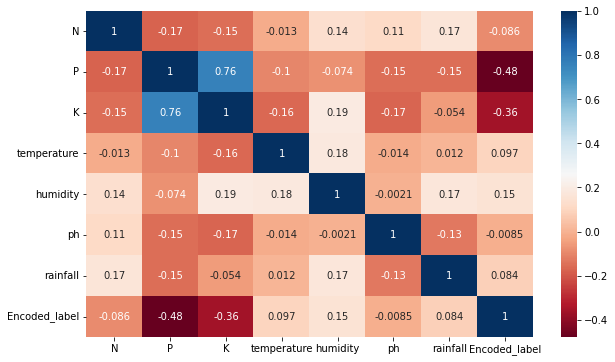

In [11]:
#checking the corelation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

From the above diagram, the variable 'K' and 'P' have high positive corelation

In [12]:
#EDA
data.describe()

,N,P,K,temperature,humidity,ph,rainfall,Encoded_label
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,48.181905,55.060000,48.057143,25.471157,70.488397,6.474750,107.214784,10.000000
std,36.016740,32.772902,51.833864,5.134671,22.303929,0.790175,53.425191,6.056743
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,30.920140,0.000000
25%,20.000000,31.000000,20.000000,22.602437,59.237124,5.948298,67.133894,5.000000
50%,36.000000,53.000000,30.000000,25.373357,79.995776,6.431478,97.659622,10.000000
75%,80.250000,69.000000,47.000000,28.282950,88.018773,6.945725,130.140535,15.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,20.000000


Variable Name : N


C:\Users\zainr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


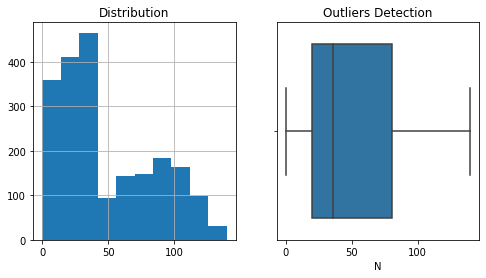



Variable Name : P


C:\Users\zainr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


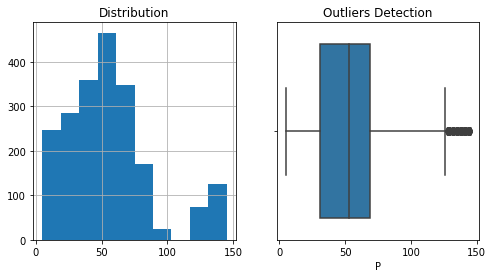



Variable Name : K


C:\Users\zainr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


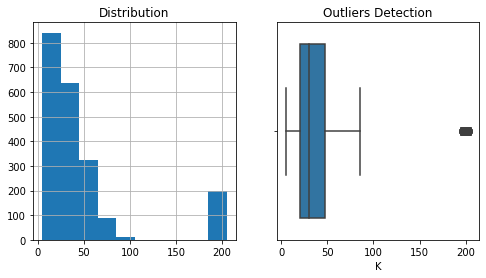



Variable Name : TEMPERATURE


C:\Users\zainr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


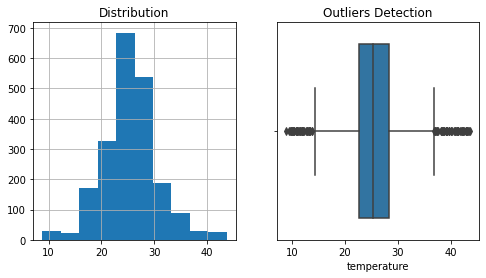



Variable Name : HUMIDITY


C:\Users\zainr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


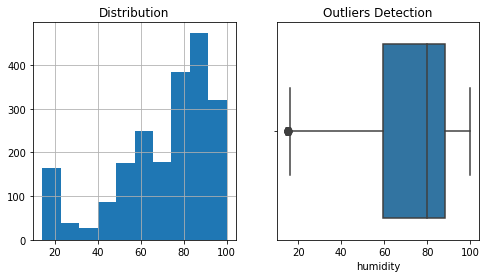



Variable Name : PH


C:\Users\zainr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


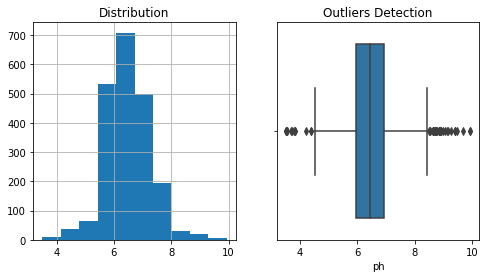



Variable Name : RAINFALL


C:\Users\zainr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


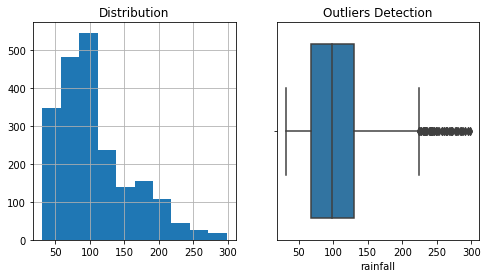

In [13]:
#checking for outliers in the data
for i in data.columns[:-2]:
    print('Variable Name :',i.upper())
    fig, axes = plt.subplots(1,2,figsize=(8,4))
    axes[0].set_title('Distribution')
    axes[1].set_title('Outliers Detection')
    data[i].hist(ax=axes[0])
    sns.boxplot(data[i],ax=axes[1])
    plt.show()
    print('\n')

Variable : N


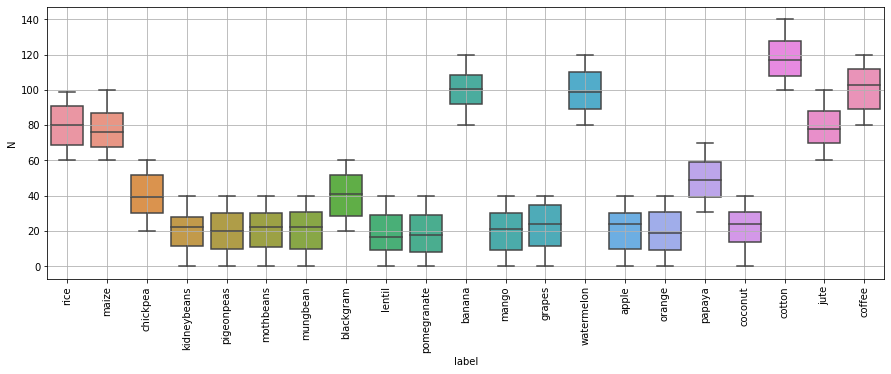

Variable : P


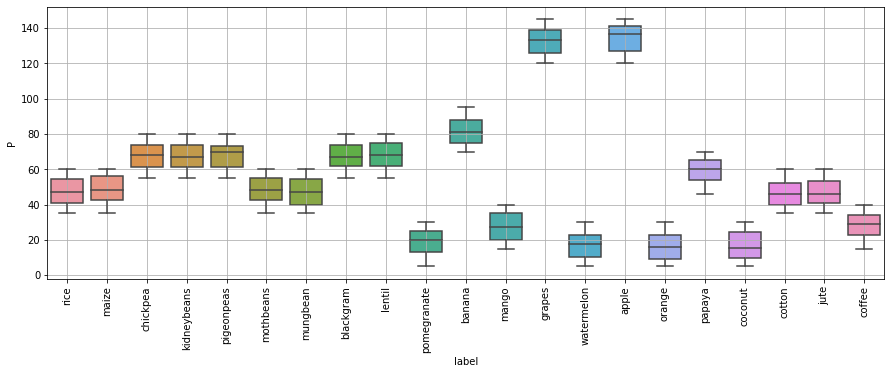

Variable : K


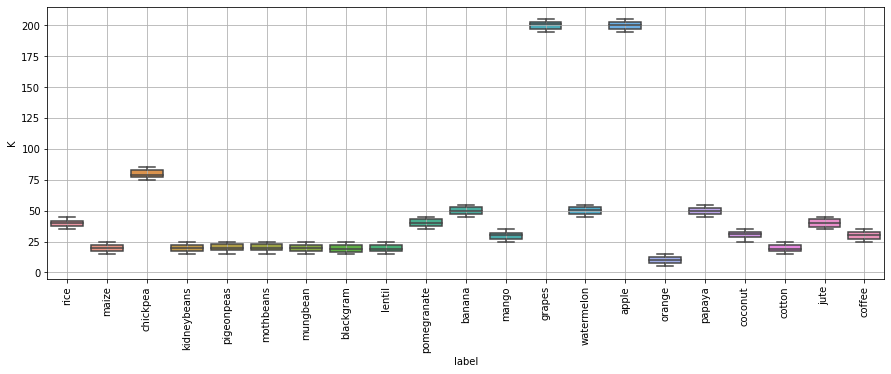

Variable : TEMPERATURE


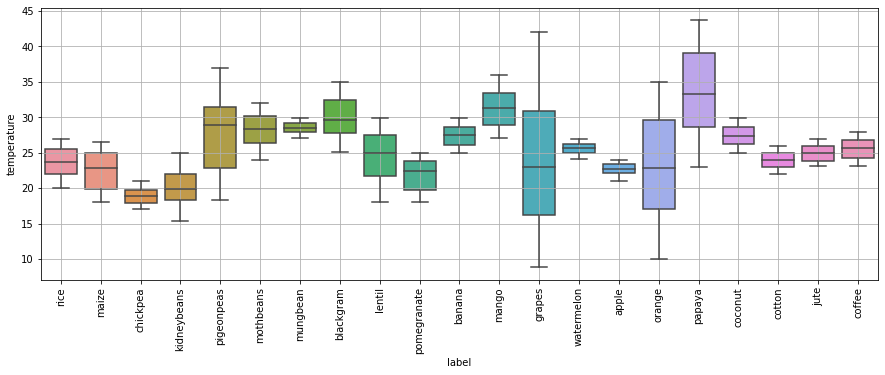

Variable : HUMIDITY


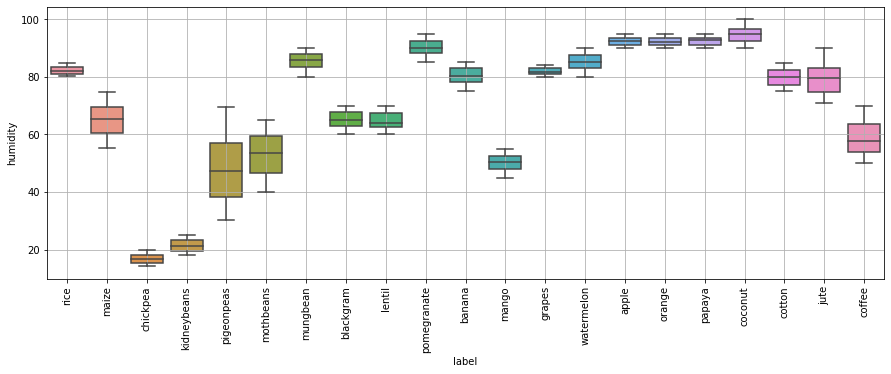

Variable : PH


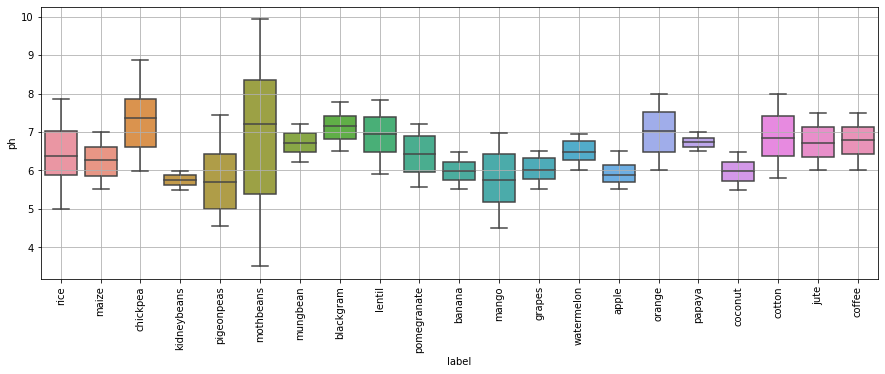

Variable : RAINFALL


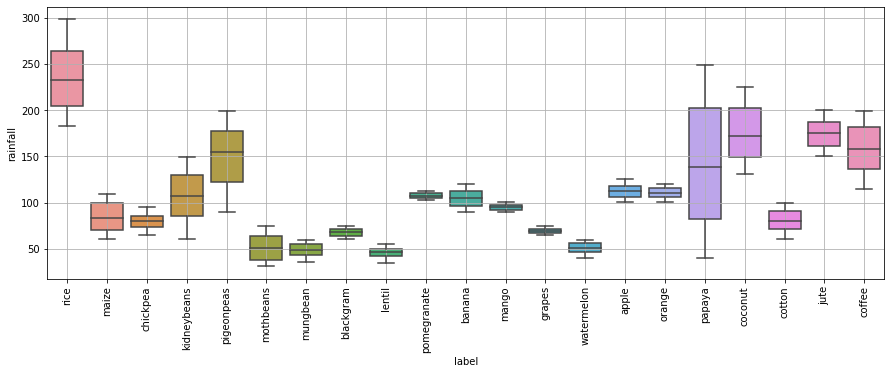

In [14]:
#plotting effect of input variable with output variable
for i in data.columns[:-2]:
    plt.figure(figsize=(15,5))
    print('Variable :',i.upper())
    sns.boxplot(x=data.label,y=data[i])
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()

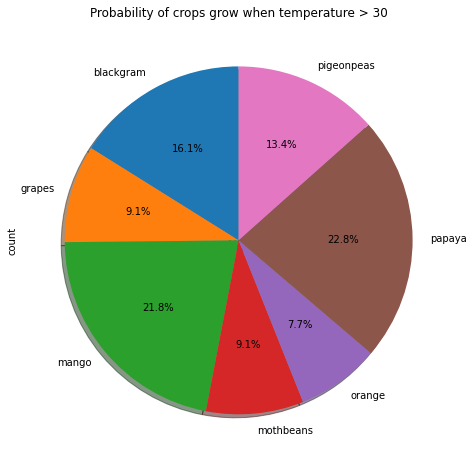

In [15]:
#which crops can grow at higher temperature .i.e., temperature > 30
x = pd.DataFrame(pd.crosstab(data.label[data.temperature > 30],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when temperature > 30')
plt.show()

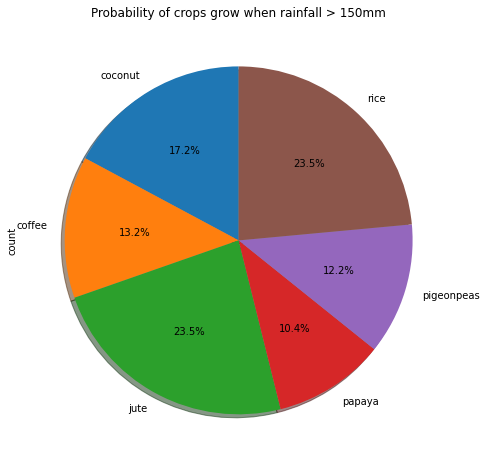

In [16]:
#which crops can grow at higher rainfall .i.e., rainfall > 150mm
x1 = pd.DataFrame(pd.crosstab(data.label[data.rainfall > 150],'count',normalize=True)*100)
x1.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when rainfall > 150mm')
plt.show()

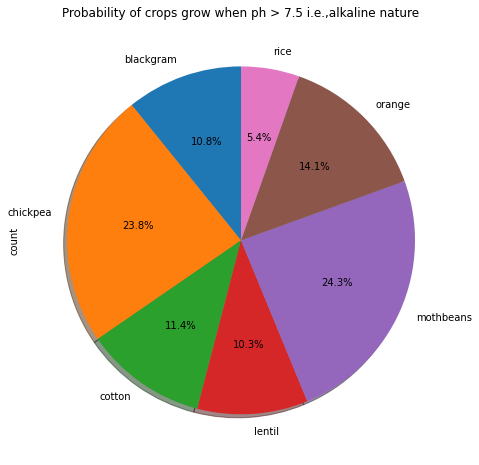

In [17]:
#which crops can grow at higher ph value .i.e., (alkaline nature) ph > 7.5
x = pd.DataFrame(pd.crosstab(data.label[data.ph > 7.5],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when ph > 7.5 i.e.,alkaline nature')
plt.show()

In [18]:
#Splitting the data into input and output
x = data.iloc[:,:-2]
y = data.Encoded_label
print('Input variables \n',x.head())
print('\nOutput Variable\n',y.head())

Input variables 
     N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

Output Variable
 0    19
1    19
2    19
3    19
4    19
Name: Encoded_label, dtype: int32


In [19]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print('Shape of Splitting :')
print('x_train = {}, x_test = {}, y_train = {}, y_test = {}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

Shape of Splitting :
x_train = (1680, 7), x_test = (420, 7), y_train = (1680,), y_test = (420,)


## Building Logistic regression model

In [20]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

C:\Users\zainr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix : 



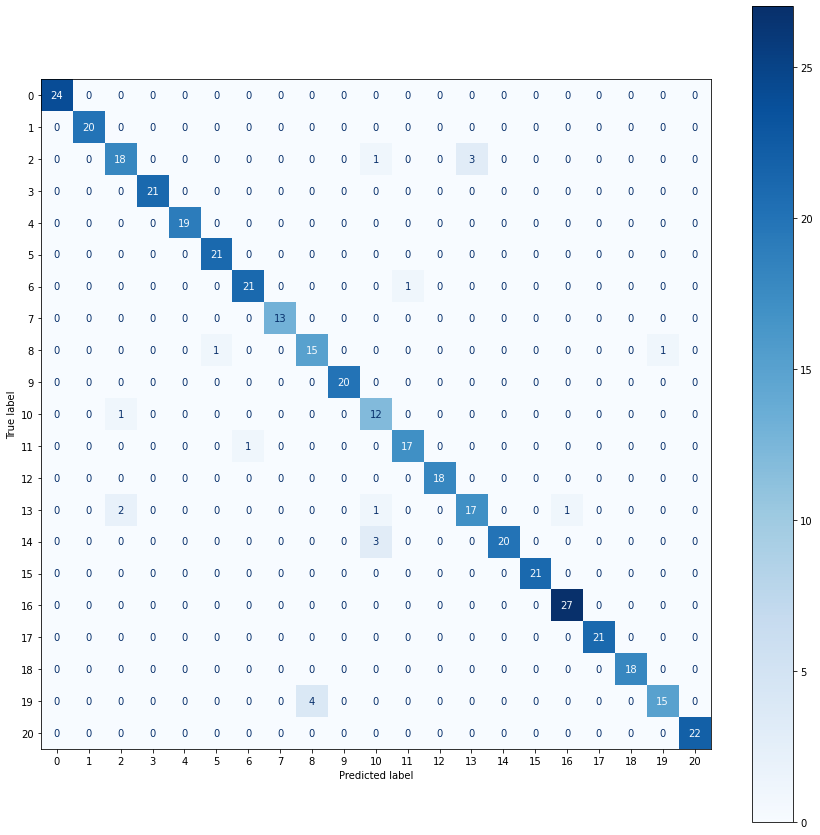

In [21]:
#Initializing the model
logis = LogisticRegression()
pred_logis = logis.fit(x_train,y_train).predict(x_test)
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(logis,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [22]:
#classification report
print('REPORT : \n',classification_report(y_test,pred_logis))
acc_logis = accuracy_score(y_test,pred_logis)

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        20
           2       0.86      0.82      0.84        22
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        19
           5       0.95      1.00      0.98        21
           6       0.95      0.95      0.95        22
           7       1.00      1.00      1.00        13
           8       0.79      0.88      0.83        17
           9       1.00      1.00      1.00        20
          10       0.71      0.92      0.80        13
          11       0.94      0.94      0.94        18
          12       1.00      1.00      1.00        18
          13       0.85      0.81      0.83        21
          14       1.00      0.87      0.93        23
          15       1.00      1.00      1.00        21
          16       0.96      1.00      0.98        27
          17    

## Building RandomForest model

In [23]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [24]:
#initializing the model and fitting for train data
rand = RandomForestClassifier()
pred_rand = rand.fit(x_train,y_train).predict(x_test)
acc_rand = accuracy_score(y_test,pred_rand)
acc_rand

0.9904761904761905

In [25]:
rand.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [26]:
#selecting parameters using GridSearchCV
param = {'n_estimators':range(10,50,10),
         'criterion':['gini'],
         'max_depth':range(1,20,2),
         'max_features':[1,2,3],
         'min_samples_leaf':range(1,10,2),
         'min_samples_split':range(1,40,10)}
grid_rand = GridSearchCV(rand,param,cv=5,n_jobs=-1,verbose=1)
grid_rand.fit(x_train,y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


C:\Users\zainr\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.98392857 0.98809524 0.99166667]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 20, 2),
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(1, 40, 10),
                         'n_estimators': range(10, 50, 10)},
             verbose=1)

In [27]:
print(grid_rand.best_params_)
print(grid_rand.best_score_)

{'criterion': 'gini', 'max_depth': 11, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 21, 'n_estimators': 40}
0.9970238095238095


Confusion Matrix : 



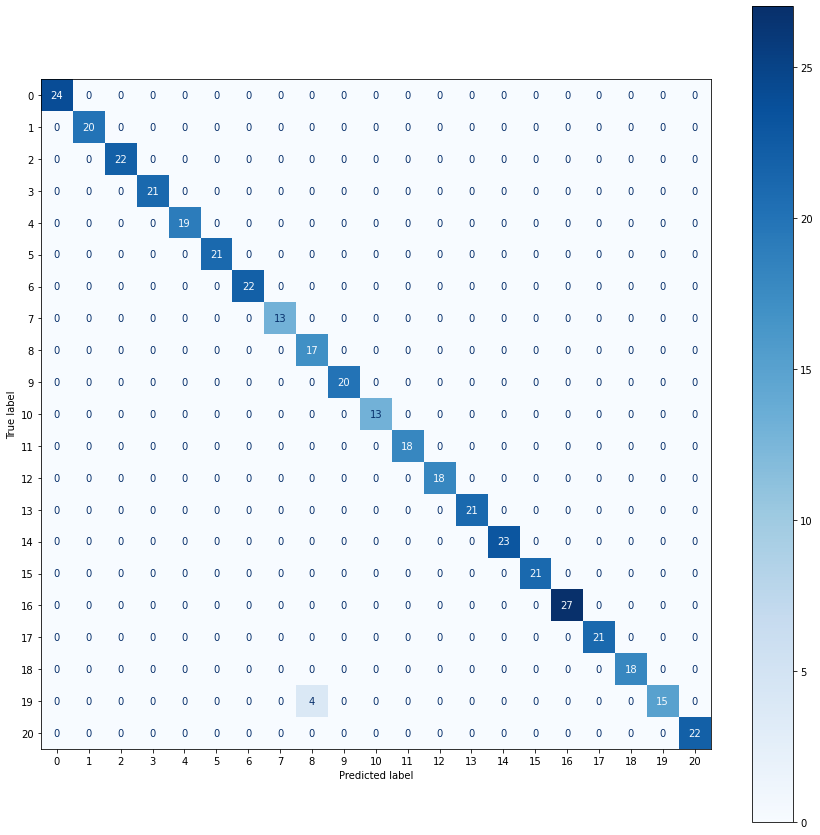

In [28]:
#predicting for test data and plotting confusion matrix
pred_rand = grid_rand.predict(x_test)
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(grid_rand,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [29]:
#classification report
print('REPORT : \n',classification_report(y_test,pred_rand))

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        13
           8       0.81      1.00      0.89        17
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        27
          17    

In [30]:
#importing pickle file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [31]:
a = [[80,35,40,30,10000,-1,0]]

In [32]:
pickle_in = open('classifier.pkl','rb')
model = pickle.load(pickle_in)
pre = model.predict_proba(a)
pre = pd.DataFrame(data = np.round(pre.T*100,2), index=classes.index,columns=['predicted_values'])
pre

,predicted_values
label,
apple,0.00
banana,7.75
blackgram,0.00
chickpea,0.00
coconut,7.50
coffee,5.00
cotton,0.00
grapes,0.00
jute,4.28


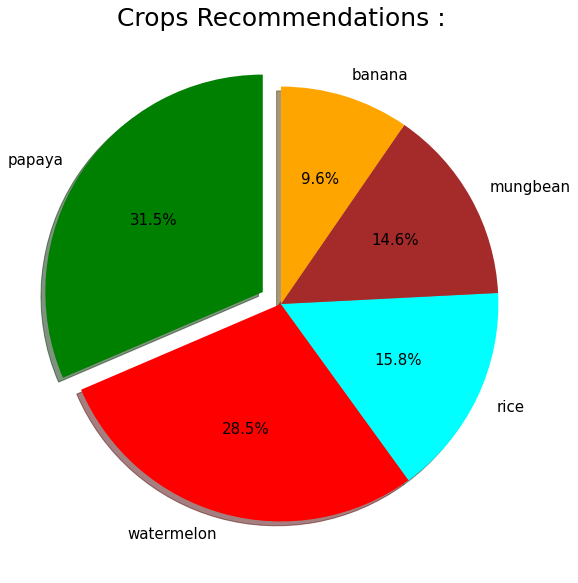

In [33]:
high = pre.predicted_values.nlargest(5)
plt.figure(figsize=(15,10))
plt.rcParams['font.size']=15
plt.title('Crops Recommendations :',fontdict={'fontsize': 25, 'fontweight': 'medium'})
plt.pie(x=high,labels=high.index,autopct='%1.1f%%',explode=(0.1, 0, 0, 0, 0),shadow=True,startangle=90,
        colors=['green','red','cyan','brown','orange'])

plt.show()

In [34]:
highest = pre.predicted_values.nlargest(1)

for ind, val in highest.iteritems():
    new_h = ind
new_h
# print(tmp)

'papaya'

In [35]:
# loading the dataset

crop_data=pd.read_csv("crop_production.csv")
crop_data['Crop'] = crop_data['Crop'].str.lower()
#lst = list(crop_data['Crop'].str.lower().unique())
#lst.sort()
#print(lst)

crop_data['Crop'] = crop_data['Crop'].replace(['moth','peas  (vegetable)','bean','moong(green gram)','pome granet','water melon','cotton(lint)','gram'],['mothbeans','pigeonpeas','kidneybeans','mungbean','pomegranate','watermelon','cotton','chickpea'])

crop_data = crop_data[crop_data['Crop'].isin(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas','mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate','banana', 'mango', 'grapes', 'watermelon', 'apple','orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'])]

crop_data = crop_data.drop(['State_Name','District_Name'],axis = 1)

crop_data

,Crop_Year,Season,Crop,Area,Production
2,2000,Kharif,rice,102.0,321.00
3,2000,Whole Year,banana,176.0,641.00
12,2001,Kharif,rice,83.0,300.00
18,2002,Kharif,rice,189.2,510.84
20,2002,Whole Year,banana,213.0,1278.00
...,...,...,...,...,...
246072,2014,Rabi,chickpea,198.0,203.00
246078,2014,Rabi,mungbean,64.0,40.00
246085,2014,Summer,maize,325.0,2039.00
246086,2014,Summer,rice,306.0,801.00


In [36]:
crop_data['Crop'].unique()

array(['rice', 'banana', 'maize', 'mungbean', 'cotton', 'chickpea',
       'grapes', 'mango', 'orange', 'papaya', 'pomegranate', 'pigeonpeas',
       'jute', 'blackgram', 'mothbeans', 'coffee', 'watermelon', 'lentil',
       'kidneybeans', 'apple'], dtype=object)

In [37]:
# dataset columns
crop_data.columns

Index(['Crop_Year', 'Season', 'Crop', 'Area', 'Production'], dtype='object')

In [38]:
crop_data.describe()

,Crop_Year,Area,Production
count,58461.000000,58461.000000,5.756500e+04
mean,2005.755119,21056.352565,4.596474e+04
std,5.018032,48398.529629,1.275836e+05
min,1997.000000,1.000000,0.000000e+00
25%,2002.000000,154.000000,1.890000e+02
50%,2006.000000,1800.000000,2.958000e+03
75%,2010.000000,15370.000000,2.670100e+04
max,2015.000000,687000.000000,2.589591e+06


In [39]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

Crop_Year       0
Season          0
Crop            0
Area            0
Production    896
dtype: int64

In [40]:
# Dropping missing values 
crop_data = crop_data.dropna()
crop_data

,Crop_Year,Season,Crop,Area,Production
2,2000,Kharif,rice,102.0,321.00
3,2000,Whole Year,banana,176.0,641.00
12,2001,Kharif,rice,83.0,300.00
18,2002,Kharif,rice,189.2,510.84
20,2002,Whole Year,banana,213.0,1278.00
...,...,...,...,...,...
246072,2014,Rabi,chickpea,198.0,203.00
246078,2014,Rabi,mungbean,64.0,40.00
246085,2014,Summer,maize,325.0,2039.00
246086,2014,Summer,rice,306.0,801.00


In [41]:
#checking
crop_data.isnull().values.any()

False

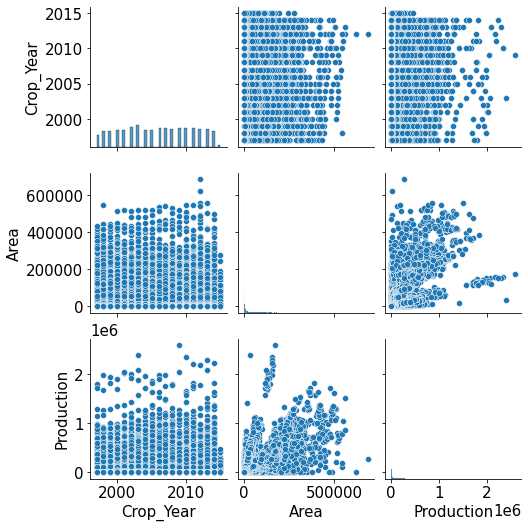

In [42]:
# Visualizing the features

ax = sns.pairplot(crop_data)
ax

In [43]:
data = crop_data

In [44]:
data.corr()

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.003892,0.030581
Area,-0.003892,1.000000,0.770546
Production,0.030581,0.770546,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

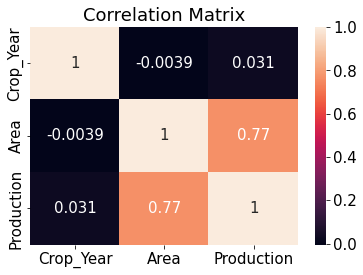

In [45]:
sns.heatmap(data.corr(), annot =True)
plt.title('Correlation Matrix')

In [46]:
dummy = pd.get_dummies(data)
dummy

,Crop_Year,Area,Production,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Crop_apple,...,Crop_maize,Crop_mango,Crop_mothbeans,Crop_mungbean,Crop_orange,Crop_papaya,Crop_pigeonpeas,Crop_pomegranate,Crop_rice,Crop_watermelon
2,2000,102.0,321.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2000,176.0,641.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,2001,83.0,300.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18,2002,189.2,510.84,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20,2002,213.0,1278.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246072,2014,198.0,203.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246078,2014,64.0,40.00,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
246085,2014,325.0,2039.00,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
246086,2014,306.0,801.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
from sklearn.model_selection import train_test_split

x = dummy.drop(["Production"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75% train

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (43173, 28)
x_test : (14392, 28)
y_train : (43173,)
y_test : (14392,)


In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([5.21181818e+02, 1.35172727e+03, 4.03870000e+04, ...,
       2.16363636e+01, 2.77829091e+03, 4.88849818e+05])

In [49]:
model.score(x_test,y_test)

0.838158949580062

In [50]:

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.838158949580062


In [51]:
# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-r1)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.8378434479848689


C:\Users\zainr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\zainr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Random Forest Regression')

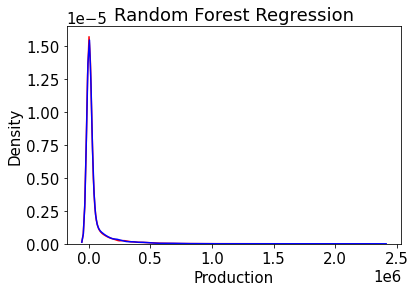

In [52]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

In [53]:
inp = [2012, 'Kharif',new_h,100]

test_row = x_test.head(1)

test_row['Crop_Year'] = inp[0]

string = ""
for i in test_row.columns[2:]:
    string = str(i)
    if inp[1] in string or inp[2] in string:
        test_row[i] = 1
    else: 
        test_row[i] = 0

test_row['Area'] = inp[3]

production = model.predict(test_row)[0]

yd = production/test_row['Area']
print("prouction: ",production)
for ind,val in yd.iteritems():
    print("yield: ",val)

prouction:  6774.454545454545
yield:  67.74454545454545


C:\Users\zainr\AppData\Local\Temp/ipykernel_19176/1651425909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_row['Crop_Year'] = inp[0]
C:\Users\zainr\AppData\Local\Temp/ipykernel_19176/1651425909.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_row[i] = 0
C:\Users\zainr\AppData\Local\Temp/ipykernel_19176/1651425909.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th